# Getting Started with Image Preprocessing in Python
Tutorial Link: https://www.kaggle.com/code/rimmelasghar/getting-started-with-image-preprocessing-in-python/notebook

## 1. Data Acquisition

In [25]:
# spare cell to install necessary packages

%pip install keras_preprocessing

   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   -------------------------------------- - 41.0/42.6 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 42.6/42.6 kB 688.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
# import necessary libraries

import numpy as np
import tensorflow 
import keras  
import os
import glob
import skimage
from skimage import io 
import random 
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import expand_dims
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator

In [18]:
# load dataset

dataset_pth = r"C:\Users\mohana.selvakumar\Downloads\raw-img"


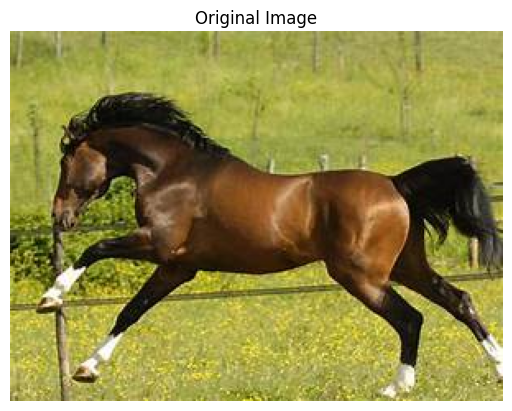

In [19]:
# access an image file from the dataset classes

image_path = os.path.join(dataset_pth, 'cavallo', 'OIP---MGqQIhmz3OEPYP-46_xwHaFj.jpeg')
image = io.imread(image_path)

# plot the original image
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()


## 2. Data Exploration

Text(0.5, 0.98, 'Original & RGB image channels')

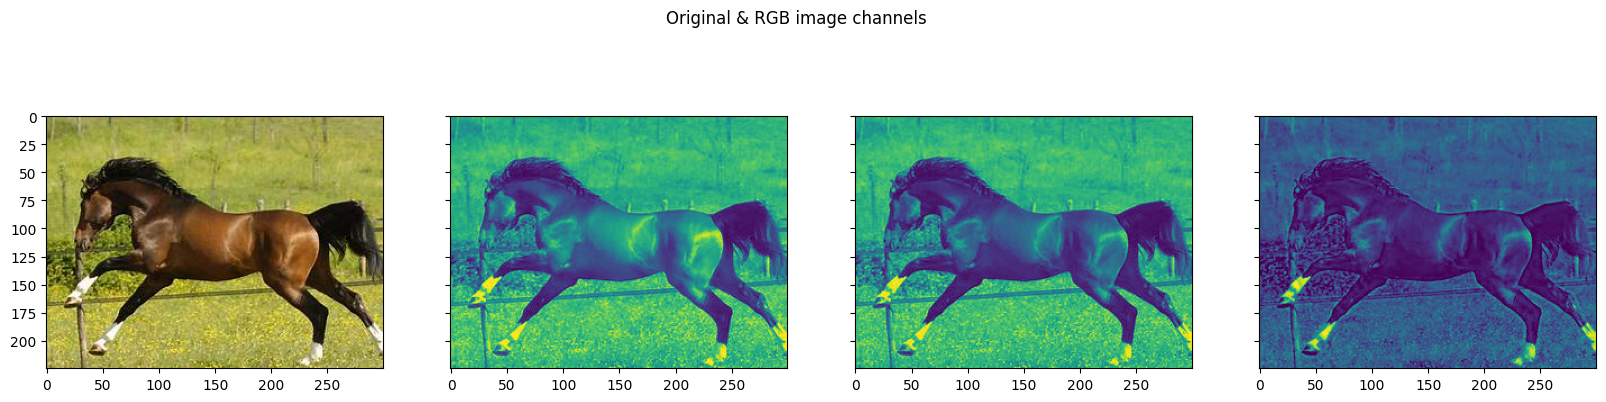

In [20]:
# plotting the original image and exploring the RGB channels  

i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20) 

im1.imshow(image)  # Original image
im2.imshow(image[:, : , 0]) # Red
im3.imshow(image[:, : , 1]) # Green
im4.imshow(image[:, : , 2]) # Blue
i.suptitle('Original & RGB image channels')

### 2.1 Grayscale Conversion
Since most pictures don’t need color to be recognized, it is wise to use grayscale, which reduces the number of pixels in an image, thus, reducing the computations required.

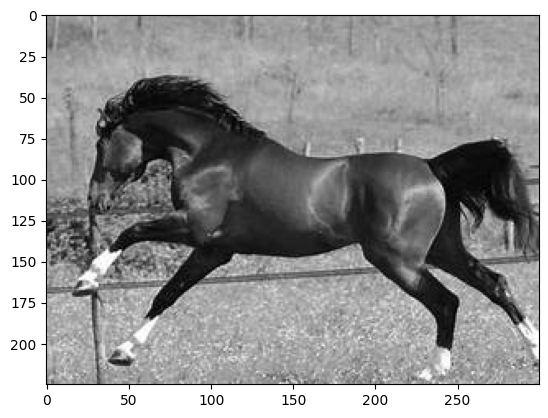

In [22]:
# convert original image to grayscale

gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

### 2.2 Normalisation
Also referred to as data re-scaling, it is the process of projecting image data pixels (intensity) to a predefined range (usually (0,1) or (-1, 1)). This is commonly used on different data formats, and you want to normalize all of them to apply the same algorithms over them.

- Fairness across all images - Allows all images to contribute equally to the total loss rather than when other images have high and low pixels ranges give strong and weak loss, respectively.
- Provides a standard learning rate - Since high pixel images require a low learning rate and low pixel images high learning rate, re-scaling helps provide a standard learning rate for all images.

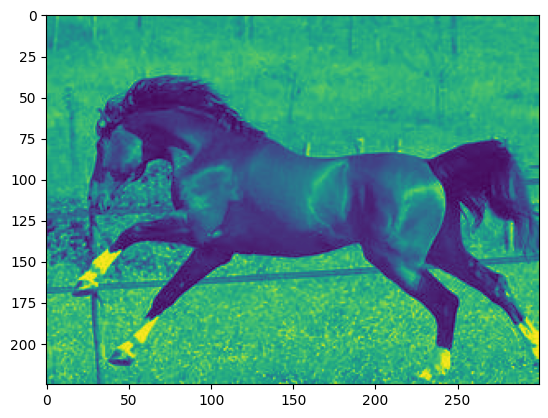

In [24]:
# min-max normalisation -  to rescale the values to a range between 0 and 1

norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
plt.imshow(norm_image)

## 3. Data Preprocessing

### 3.1 Data Augmentation
It is the process of making minor alterations to existing data to increase its diversity without collecting new data - for enlarging a dataset. Standard data augmentation techniques include horizontal & vertical flipping, rotation, cropping, shearing, etc.

- Offline augmentation - Used for small datasets. It is applied in the data preprocessing step. We will be covering this augmentation in this tutorial.
- Online augmentation- Used for large datasets. It is normally applied in real-time.

For this noebook, we use Keras’s ImageDataGenerator class to augment our data.

#### 3.1.1 Shifting - image pixels horizontally or vertically

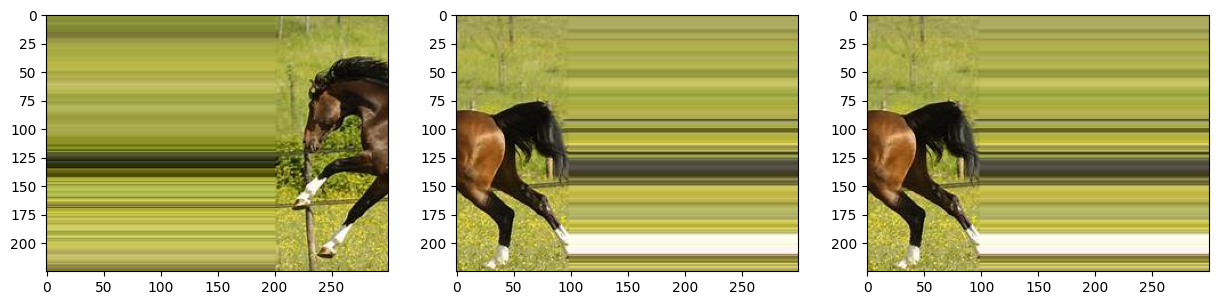

In [30]:
# convert to numpy array
data = img_to_array(image)

# expand dimension to one sample
samples = expand_dims(image, 0)

# create image data augmentation generator - width_shift_range means that the the images will be randomly shifted horizontally by a maximum of 200 pixels to the left or right
datagen = ImageDataGenerator(width_shift_range=[-200,200])

# create an iterator - flow method generates batches of augmented data
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images)

#### 3.1.2 Flipping - reverses the rows or columns of pixels in either vertical or horizontal cases

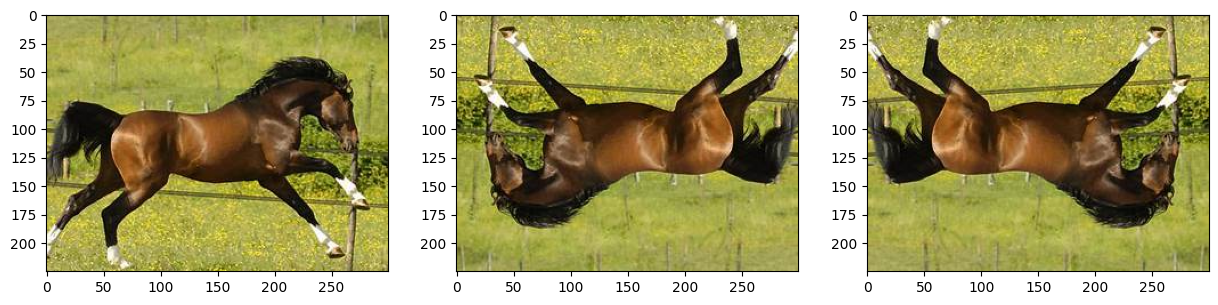

In [31]:
# ImageDataGenerator for flipping - horizontal and vertical flip set to True
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images)

#### 3.1.3 Rotation - rotating an image by a specified degree

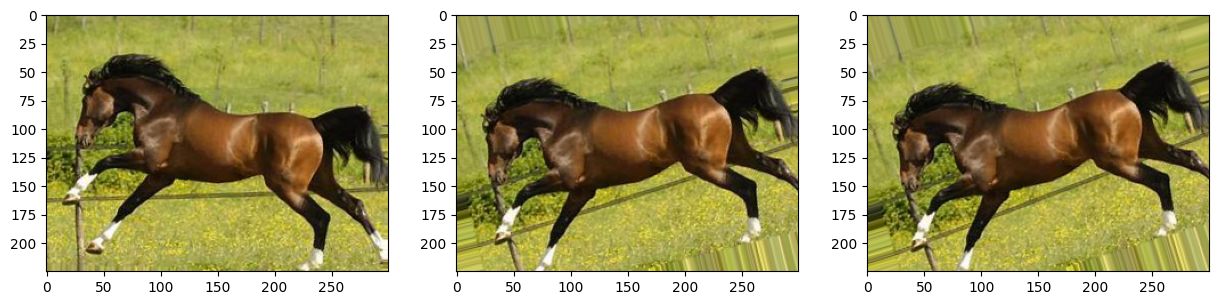

In [33]:
# ImageDataGenerator for rotation - random rotations in the range [-20 degrees, 20 degrees] and value of the nearest pixel will be used to fill in the new pixel
datagen = ImageDataGenerator(rotation_range=20, fill_mode='nearest')

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

#### 3.1.4 Changing Brightness - increasing or decreasing image contrast

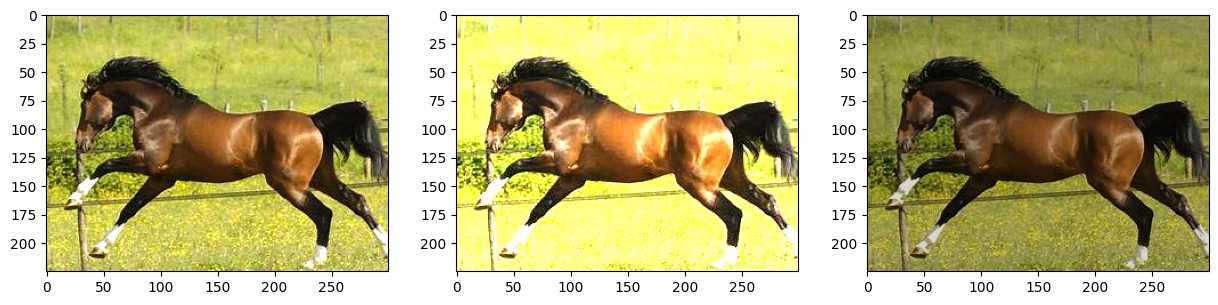

In [34]:
# ImageDataGenerator for brightness - randomly adjusted between 50% (0.5) and 200% (2.0) of the original brightness
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 

### 3.2 Standardisation
It is a method that scales and preprocesses images to have similar heights and widths. It re-scales data to have a standard deviation of 1 (unit variance) and a mean of 0.

Standardization helps to improve the quality and consistency of data.

c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
c:\Users\mohana.selvakumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


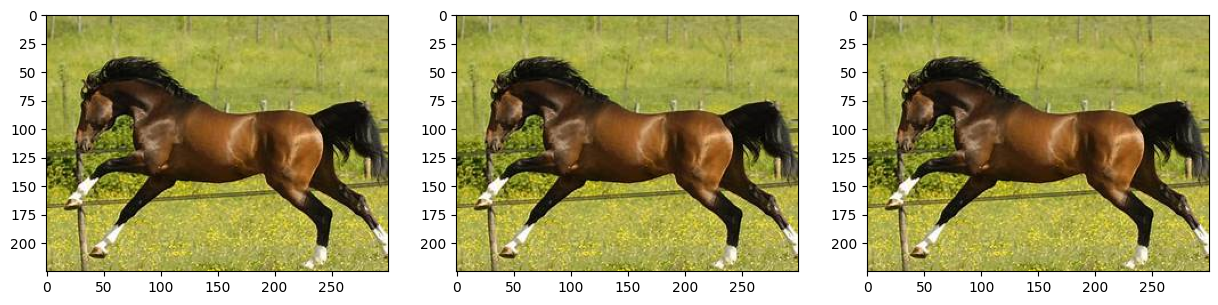

In [35]:
# creating the image data generator to standardize images
datagen = ImageDataGenerator(featurewise_center =True,
      featurewise_std_normalization = True)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

    # convert to unsigned integers
    images = next(it)[0].astype('uint8')
 
    # plot image
    im[i].imshow(images) 